# Hopfield Network

## References
[1]	S. S. Haykin, Neural networks and learning machines, 3 ed. Upper Saddle River, NJ, USA: Pearson Prentice Hall, 2009.

## 1. Dynamic Model

Dynamic model of continuous Hopfield Network can be presented as a system of equations.

$$C \frac{dv_j(t)}{dt}=-\frac{v_j(t)}{R_j}+\sum_{i=1}^Nw_{ji}\phi_i(v_i(t))+I_j \quad j=1,\dots,N (1-1)$$

It mimics a circuit model which can be referenced in [1].

(1-1) can be writed in a more familiar way to one with control engineering background.

$$
\begin{align}
\dot{\textbf{v}} &= \Lambda \textbf{v} &+ W\textbf{y} + \Lambda^{'} I \\
\textbf{y} &= \Phi (\textbf{v})
\end{align} $$

where
* $\textbf{v} = [v_1, \ldots, v_N]^T$
* $\Lambda = diag(-\frac{1}{C_1R_1}, \ldots, -\frac{1}{C_NR_N})$
* $\Lambda^{'} = diag({\frac{1}{C_1}, \ldots, \frac{1}{C_N}})$
* $W = [w_{ji}]$

Activation function of all neurons is assumed as the hyperbolic tangent function

$$\forall i: \phi_i(v) = \tanh(\frac{a_i v}{2}) = \frac{1 - \exp(-a_i v)}{1 + \exp(-a_i v)}$$

The inverse function of activation function can be expressed as

$$\phi_i^{-1}(x)=-\frac{1}{a_i}\log(\frac{1-x}{1+x})$$

We extract the common component from all $\phi_i^{-1}(x)$ and define $\phi_i^{-1}$ as 

$$\phi_i^{-1}(x)=-\log(\frac{1-x}{1+x})$$

Then, $\phi_i^{-1}$ may be expressed with the help of $\phi^{-1}$ as

$$\phi_i^{-1}(x)=\frac{1}{a_i} \phi^{-1}(x)$$

The graphic of $\phi^{-1}$ is drew on the following cell.

<IPython.core.display.Javascript object>


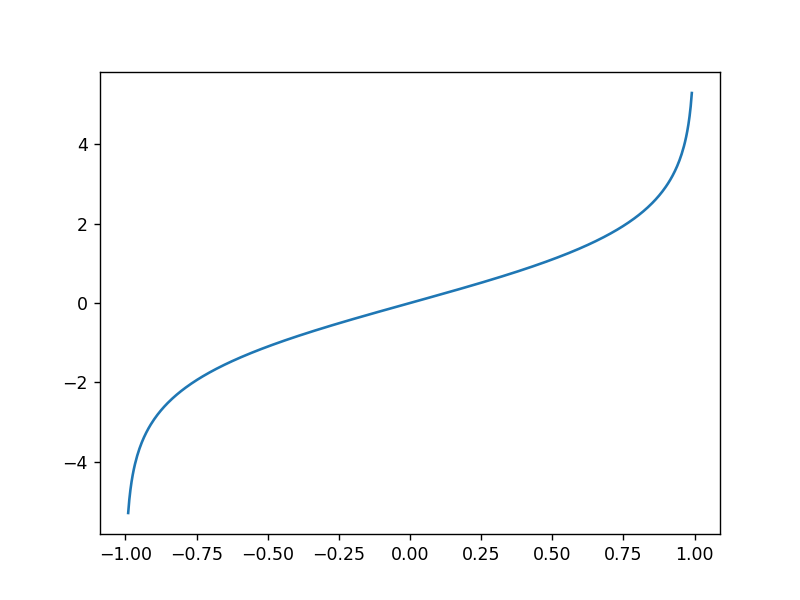

In [6]:
% matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-0.99, 0.99, 500)
y = -np.log(np.divide(1 - x, 1 + x))
line = plt.plot(x, y)

We assume further that the weight matrix $W$ is *symmetric*. Now, the stage to analyze the stability is set.

## 2. Stability of Continuous Hopfield Network

Lyapounov function is defined as 

$$E=-\frac{1}{2}y^T W y + \sum_{j=1}^N \frac{1}{R_j}\int_0^{y_j}\phi_j^{-1}(y)dy-I^Ty$$

Remark
* *It is tricky to find Lyapounov function for a nonlinear system. Just accept it for now.*
* We **have not verified** the positive-define property of $E$ yet.

To verify whether the derivative of $E$ is negative-defined, differentiate $E$ with respect to time $t$

$$
\begin{align}
\frac{dE}{dt} &=-\sum_{j=1}^{N}(\sum_{i=1}^N w_{ji}x_i - \frac{v_j}{R_j} + I_j)\frac{x_j}{dt}\\
     &=-\sum_{j=1}^{N}C_j\frac{dv_j}{dt}\frac{dx_j}{dt}\\
     &=-\sum_{j=1}^N[\frac{d}{dt}\phi_j^{-1}(x_j)]\frac{dx_j}{dt}\\
     &=-\sum_{j=1}^{N}C_j(\frac{dx_j}{dt})^2[\frac{d}{dx_j}\phi_j^{-1}(x_j)]
\end{align}
$$

It is noted that $\phi_j^{-1}(x_j)$ is *monotonically increasing function*. Therefore, it follows
$$\forall j:\frac{d}{dx_j}\phi_j^{-1}(x_j)\ge 0$$

Then, it may assert that

$$\forall t:\frac{dE}{dt}\le 0$$

It means that *continuous Hopfield Network is stable in term of Lyapunov*. 